### 분류 모델의 평가지표
##### Confusion matrix
- Confusion Matrix는 분류 모델의 성능을 평가하는 데 사용되는 도구. 모델의 예측 결과와 실제 값을 비교하여, 각각의 클래스에 대한 예측이 얼마나 정확한지를 보여줌

**Confusion Matrix의 구성 요소**
1. **True Positive (TP, 참양성)**: 모델이 실제로 양성인 것을 올바르게 양성으로 예측한 경우
2. **True Negative (TN, 참음성)**: 모델이 실제로 음성인 것을 올바르게 음성으로 예측한 경우
3. **False Positive (FP, 위양성)**: 모델이 실제로 음성인 것을 잘못 양성으로 예측한 경우, Type I Error
4. **False Negative (FN, 위음성)**: 모델이 실제로 양성인 것을 잘못 음성으로 예측한 경우.  Type II Error

##### Classification report
- 분류 모델의 성능을 평가하는 데 사용되는 종합 지표.
- FP가 중요하냐 FN이 중요하냐를 따져야 되니까
```python
          precision    recall  f1-score   support

       0       0.90      0.85      0.87       100
       1       0.80      0.88      0.84       100

accuracy                           0.86       200
macro avg      0.85      0.86      0.86       200  단순 평균
weighted avg   0.85      0.86      0.86       200  가중 평균
```


1. **Accuracy**(정확도): 전체 예측 중에서 올바르게 예측한 비율
    
    $\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$
    
    - 쉽고 직관적인 지표
    - 클래스가 불균형할 경우, 모델의 실제 성능보다 훨씬 높거나 낮은 정확도를 보임
    - 감정 모델에 중립이 73% 고 나머지 감정이 27% 면 찍어도 73%는 나옴 ㄹㅇㅋㅋ

2. Precision(정밀도): 양성으로 예측한 결과 중에서 실제로 양성인 비율
    
    $\text{Precision} = \frac{TP}{TP + FP}$
    
    - 예측값이 양성인 것의 신뢰도
    - 정답이 양성이지만, 음성으로 예측한 경우를 감지하지 못함
    - 스팸메일 같은데서는 쓰기 ㄱㅊ함 / TP만 고려하니까
    
3. Recall(재현율/민감도): 실제 양성인 데이터 중에서 모델이 양성으로 정확하게 예측한 비율
    
    $\text{Recall} = \frac{TP}{TP + FN}$
    
    - 모델이 양성 값을 찾아낼 수 있는 능력
    - 정답이 음성이지만, 양성으로 예측한 경우를 감지하지 못함
    - 의료진단은 이걸 씀
    
4. F1-score: Precision과 Recall의 조화평균
    
    $\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$
    
    - Precision과 Recall은 Trade-off 관계
        - 두 지표는 Accuracy의 단점을 보완하기에 좋으므로, 두 지표를 모두 사용하는 방법이 고안
        - 이 외에도 ROC Curve, PR Curve
    - 불균형한 데이터셋에도 효과가 좋음
    - 어느 하나가 월등하게 좋을 경우, 나머지의 수치가 높지 않더라도 좋은 결과를 반환

5. 기타 용어
- Support: 데이터 수
- macro average: 클래스 별 f1-score 산술평균
- weighted average: 클래스 별 수 가중치 곱한 f1-score 산술평균

##### Thresholding
- 이진 분류 모델은 보통 각 클래스에 속할 확률을 출력하는데, 이 확률을 특정 임계값(threshold)과 비교하여 클래스 레이블을 결정
    - 일반적으로 0.5를 기준으로 양성/음성을 결정
    - 그러나 0.5라는 기준은 인위적
- 모델의 학습이 끝나더라도, 데이터를 어떻게 구분하냐에 따라 성능이 바뀜
    - Post processing
- Threshold 조정
    - 높인다면: Positive 수 감소
    - 낮춘다면: Positive 수 증가
    - 이에 따라 Precision-Recall 값이 바뀜

##### ROC-Curve
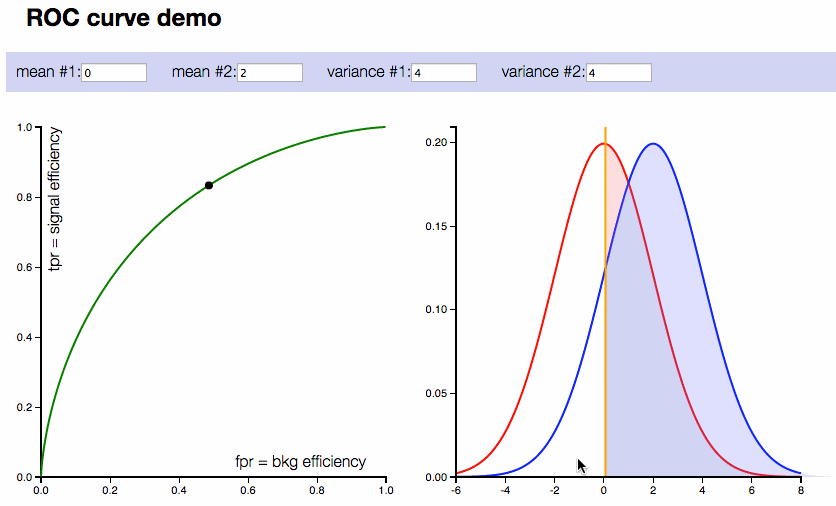
- Thresholding의 효과를 분석하기 위해 ROC Curve(Receiver Operating Characteristic Curve)와 AUC(Area Under the Curve) 사용
    - 주황색 선: Threshold
    - 파란 곡선/빨간 곡선: 양/음성 데이터의 분포
    - 두 분포를 잘 구분할 수록 좋은 모델/쉬운 데이터셋
    - ROC Curve는 모델과 데이터를 고정하고, threshold가 움직일 때 그려지는 점들을 이어 그림
    - ROC Curve의 휘는 정도는 두 데이터의 분포에 따라 변화
- AUC: 곡선 아래 면적
    - 1에 가까울 수록 성능 우수

##### Top-K
- 인간이 라벨링한 데이터에는 오류가 많이 분포
- 항상 하나만 정답이 되는 것은 아님
- 모델이 예측한 상위 k개의 클래스 중에서 실제 정답 클래스가 포함되어 있는지를 측정
- 가장 높은 확률을 예측한 단일 클래스뿐만 아니라, 상위 k개의 클래스 중에서 정답이 있는지를 확인